# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Output/cities.csv"

# Output File Path
output_path = "../Output/"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# NOTE: Adjusted the size to 2000 (from 1500) to get more samples,
# the loop is capped to get 600 samples
# When the samples are processed, data for some may not be returned and 
# we need 500 results. The API loop will be capped at 500.

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    # Added logic - Exit if got 600 cities
    if len(cities) >= 600:
        break

# Print the city count to confirm sufficient count
print(len(cities))

600


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Begin data retreival 
print("Beginning Data Retrieval")
print('-----------------------------')

# Create Empty Lists 
city = []
cloudiness = []
country = []
weatherdate = []
humidity = []
lat = []
lng = []
maxtemp = []
windspeed = []

# Counter to record number of successful & error calls
success_count = 0
error_count = 0
total_count = 0

# Current date 
curdate =  datetime.now()

# Base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
api = "&appid="

for i, c in enumerate(cities):
    # Establish URL
    url_w = base_url + c + api + weather_api_key
    
    # Print processing status 
    print("Processing Record # {} | City: {}".format(i+1, c))

    # Response
    response = requests.get(url_w)
    total_count = total_count + 1

    # Successful response
    if response.status_code == 200:
        # maintain success count 
        success_count = success_count + 1
        # establish lists for dataframe & plotting
        
        # city
        city.append(str(c))
        # cloudy
        cloudiness.append(response.json()['clouds']['all'])
        # country
        country.append(response.json()['sys']['country'])
        # date
        weatherdate.append(response.json()['dt'])
        # humidity 
        humidity.append(response.json()['main']['humidity'])
        # latitude 
        lat.append(response.json()['coord']['lat'])
        # longitude 
        lng.append(response.json()['coord']['lon'])
        # Max temperature
        temp_kel = response.json()['main']['temp_max']
        temp_fnh = (((temp_kel - 273.15) * 9/5) + 32)
        maxtemp.append(temp_fnh)
        # wind speed
        windspeed.append(response.json()['wind']['speed'])
    else:
        error_count = error_count  + 1
        print("City {} not found. Skipping... | Response: {}".format(c, response))

    # Check if 500 city records successfully processed - Skip if >= 500 (we only need data for 500 cities)
    if success_count >= 500:
        break

# End data retreival
print('-----------------------------')
print("Ending Data Retrieval")
print("Total numnber of records processed {}. Number of records in error: {}. Number of successful records {}".format(total_count,error_count,success_count))

Beginning Data Retrieval
-----------------------------
Processing Record # 1 | City: jamestown
Processing Record # 2 | City: albany
Processing Record # 3 | City: upernavik
Processing Record # 4 | City: port alfred
Processing Record # 5 | City: mataura
Processing Record # 6 | City: kapaa
Processing Record # 7 | City: new norfolk
Processing Record # 8 | City: luanda
Processing Record # 9 | City: bluff
Processing Record # 10 | City: rikitea
Processing Record # 11 | City: provideniya
Processing Record # 12 | City: kemijarvi
City kemijarvi not found. Skipping... | Response: <Response [404]>
Processing Record # 13 | City: namibe
Processing Record # 14 | City: baiyin
Processing Record # 15 | City: longyearbyen
Processing Record # 16 | City: lima
Processing Record # 17 | City: punta arenas
Processing Record # 18 | City: vaini
Processing Record # 19 | City: adrar
Processing Record # 20 | City: kodiak
Processing Record # 21 | City: nuuk
Processing Record # 22 | City: vestmannaeyjar
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert to dataframe 

weatherdf = pd.DataFrame(list(zip(city, cloudiness, country, weatherdate, humidity, lat, lng, maxtemp, windspeed)), \
                        columns = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])

In [5]:
# describe dataframe 
weatherdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
City          500 non-null object
Cloudiness    500 non-null int64
Country       500 non-null object
Date          500 non-null int64
Humidity      500 non-null int64
Lat           500 non-null float64
Lng           500 non-null float64
Max Temp      500 non-null float64
Wind Speed    500 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 35.3+ KB


In [6]:
# display the dataframe 
weatherdf.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,jamestown,90,US,1580959836,63,42.10,-79.24,30.002,2.60
1,albany,40,US,1580959759,68,42.60,-73.97,30.002,1.50
2,upernavik,100,GL,1580959877,91,72.79,-56.15,-12.100,5.56
3,port alfred,100,ZA,1580959877,95,-33.59,26.89,68.000,1.79
4,mataura,53,NZ,1580959877,71,-46.19,168.86,55.994,6.71


In [7]:
# output to csv
weatherdf.to_csv(path_or_buf = output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

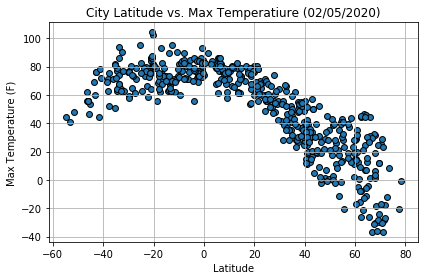

In [8]:
weatherdf.plot.scatter(x = 'Lat', y = 'Max Temp', c= 'tab:blue', edgecolors = 'black', s = 35)
plt.title('City Latitude vs. Max Temperatiure (' + curdate.strftime("%m/%d/%Y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.tight_layout()
filename = 'Fig1.png'
# Save 
plt.savefig(output_path + filename)
# Show
plt.show()

#### Latitude vs. Humidity Plot

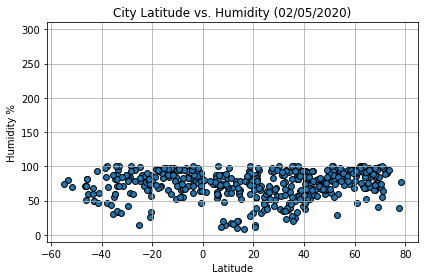

In [10]:
weatherdf.plot.scatter(x = 'Lat', y = 'Humidity', c= 'tab:blue', edgecolors = 'black', s = 35)
plt.title('City Latitude vs. Humidity (' + curdate.strftime("%m/%d/%Y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.ylim([-10,310])
plt.grid()
plt.tight_layout()
filename = 'Fig2.png'
# Save 
plt.savefig(output_path + filename)
# Show
plt.show()

#### Latitude vs. Cloudiness Plot

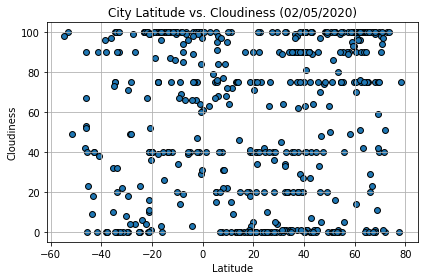

In [11]:
weatherdf.plot.scatter(x = 'Lat', y = 'Cloudiness', c= 'tab:blue', edgecolors = 'black', s = 35)
plt.title('City Latitude vs. Cloudiness (' + curdate.strftime("%m/%d/%Y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.tight_layout()
filename = 'Fig3.png'
# Save 
plt.savefig(output_path + filename)
# Show
plt.show()

#### Latitude vs. Wind Speed Plot

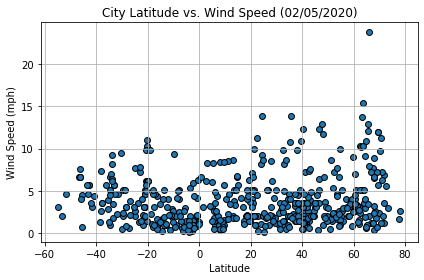

In [12]:
weatherdf.plot.scatter(x = 'Lat', y = 'Wind Speed', c= 'tab:blue', edgecolors = 'black', s = 35)
plt.title('City Latitude vs. Wind Speed (' + curdate.strftime("%m/%d/%Y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.tight_layout()
filename = 'Fig4.png'
# Save 
plt.savefig(output_path + filename)
# Show
plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
### Note: Skipping function as plt.show() does not work great in jupyter lab if all plot code is not togther 

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_h_df = weatherdf[weatherdf['Lat'] > 0]
southern_h_df = weatherdf[weatherdf['Lat'] < 0]

In [15]:
# Display northern hemisphere dataframe
northern_h_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,jamestown,90,US,1580959836,63,42.10,-79.24,30.002,2.60
1,albany,40,US,1580959759,68,42.60,-73.97,30.002,1.50
2,upernavik,100,GL,1580959877,91,72.79,-56.15,-12.100,5.56
5,kapaa,90,US,1580959877,94,22.08,-159.32,69.800,1.02
10,provideniya,0,RU,1580959878,69,64.38,-173.30,-11.200,3.00
...,...,...,...,...,...,...,...,...,...
492,shiyan,100,CN,1580959942,35,32.65,110.78,35.006,1.45
493,severo-yeniseyskiy,70,RU,1580959942,93,60.37,93.04,14.324,3.47
494,thinadhoo,100,MV,1580959942,80,0.53,72.93,82.562,6.64
496,krasnoselkup,100,RU,1580959942,94,65.70,82.47,26.924,12.12


In [16]:
# Display southern hemisphere dataframe
southern_h_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
3,port alfred,100,ZA,1580959877,95,-33.59,26.89,68.000,1.79
4,mataura,53,NZ,1580959877,71,-46.19,168.86,55.994,6.71
6,new norfolk,40,AU,1580959877,49,-42.78,147.06,75.992,5.70
7,luanda,75,AO,1580959877,94,-8.84,13.23,77.000,1.00
8,bluff,42,NZ,1580959877,71,-46.60,168.33,55.994,6.71
...,...,...,...,...,...,...,...,...,...
485,colquechaca,87,BO,1580959941,73,-18.67,-66.02,55.868,2.35
491,karratha,99,AU,1580959942,74,-20.74,116.85,87.170,5.69
495,puerto narino,75,CO,1580959942,100,-3.77,-70.38,78.800,1.00
497,ikalamavony,99,MG,1580959942,82,-21.15,46.58,64.454,2.10


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7374544367240446


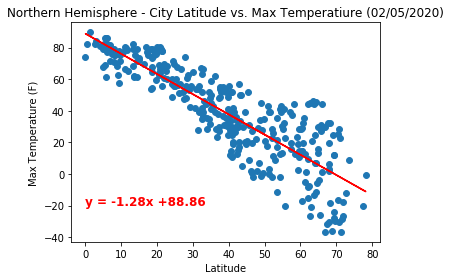

In [17]:
# Regrssion line calculation 
slope, intercept, r_value, p_value, std_err = linregress(northern_h_df['Lat'],northern_h_df['Max Temp'])
# linear regression line
x = northern_h_df['Lat']
y_pred = intercept + slope * x
regression_text = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
# Print coefficient of determination (r_squared)
print("The r-squared is: {}".format(r_value**2))
# Scatter plot linear regression line
northern_h_df.plot.scatter(x = 'Lat', y = 'Max Temp', s = 35)
plt.plot(x,y_pred, color="red")
plt.text(0, -20, regression_text, color = 'red', fontsize = 12, fontweight = 'bold')

plt.title('Northern Hemisphere - City Latitude vs. Max Temperatiure (' + curdate.strftime("%m/%d/%Y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.tight_layout()
filename = '/Northern_Hemisphere/North_Fig1.png'
# Save 
plt.savefig(output_path + filename)
# Show
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.22165418723086736


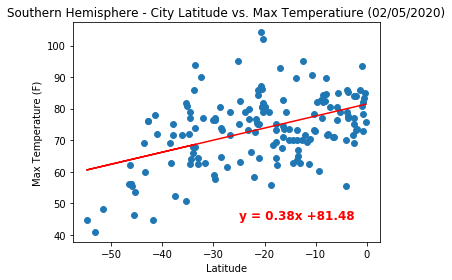

In [18]:
# Regrssion line calculation 
slope, intercept, r_value, p_value, std_err = linregress(southern_h_df['Lat'],southern_h_df['Max Temp'])
# linear regression line
x = southern_h_df['Lat']
y_pred = intercept + slope * x
regression_text = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
# Print coefficient of determination (r_squared)
print("The r-squared is: {}".format(r_value**2))
# Scatter plot with regression line 
southern_h_df.plot.scatter(x = 'Lat', y = 'Max Temp', s = 35)
plt.plot(x,y_pred, color="red")
plt.text(-25, 45, regression_text, color = 'red', fontsize = 12, fontweight = 'bold')

plt.title('Southern Hemisphere - City Latitude vs. Max Temperatiure (' + curdate.strftime("%m/%d/%Y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.tight_layout()
filename = '/Southern_Hemisphere/South_Fig1.png'
# Save 
plt.savefig(output_path + filename)
# Show
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12425177644596563


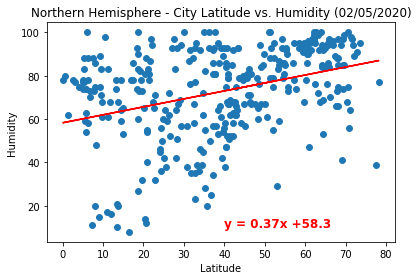

In [19]:
# Regrssion line calculation 
slope, intercept, r_value, p_value, std_err = linregress(northern_h_df['Lat'],northern_h_df['Humidity'])
# linear regression line
x = northern_h_df['Lat']
y_pred = intercept + slope * x
regression_text = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
# Print coefficient of determination (r_squared)
print("The r-squared is: {}".format(r_value**2))
# Scatter plot with regression line 
northern_h_df.plot.scatter(x = 'Lat', y = 'Humidity', s = 35)
plt.plot(x,y_pred, color="red")
plt.text(40, 10, regression_text, color = 'red', fontsize = 12, fontweight = 'bold')

plt.title('Northern Hemisphere - City Latitude vs. Humidity (' + curdate.strftime("%m/%d/%Y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.tight_layout()
filename = 'Northern_Hemisphere/North_Fig2.png'
# Save 
plt.savefig(output_path + filename)
# Show
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06603125976056068


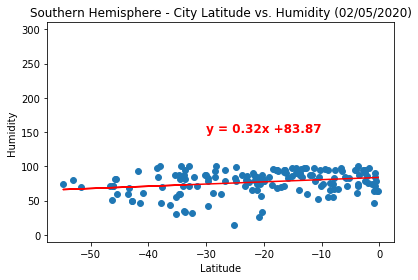

In [20]:
# Regrssion line calculation 
slope, intercept, r_value, p_value, std_err = linregress(southern_h_df['Lat'],southern_h_df['Humidity'])
# linear regression line
x = southern_h_df['Lat']
y_pred = intercept + slope * x
regression_text = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
# Print coefficient of determination (r_squared)
print("The r-squared is: {}".format(r_value**2))
# Scatter plot with regression line 
southern_h_df.plot.scatter(x = 'Lat', y = 'Humidity', s = 35)
plt.plot(x,y_pred, color="red")
plt.text(-30, 150, regression_text, color = 'red', fontsize = 12, fontweight = 'bold')

plt.title('Southern Hemisphere - City Latitude vs. Humidity (' + curdate.strftime("%m/%d/%Y") + ')')
plt.ylim([-10,310])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.tight_layout()
filename = 'Southern_Hemisphere/South_Fig2.png'
# Save 
plt.savefig(output_path + filename)
# Show
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05033667350821282


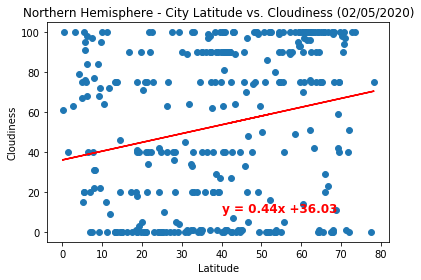

In [21]:
# Regrssion line calculation 
slope, intercept, r_value, p_value, std_err = linregress(northern_h_df['Lat'],northern_h_df['Cloudiness'])
# linear regression line
x = northern_h_df['Lat']
y_pred = intercept + slope * x
regression_text = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
# Print coefficient of determination (r_squared)
print("The r-squared is: {}".format(r_value**2))
# Scatter plot linear regression line
northern_h_df.plot.scatter(x = 'Lat', y = 'Cloudiness', s = 35)
plt.plot(x,y_pred, color="red")
plt.text(40, 10, regression_text, color = 'red', fontsize = 12, fontweight = 'bold')

plt.title('Northern Hemisphere - City Latitude vs. Cloudiness (' + curdate.strftime("%m/%d/%Y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.tight_layout()
filename = 'Northern_Hemisphere/North_Fig3.png'
# Save 
plt.savefig(output_path + filename)
# Show
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07721816399762457


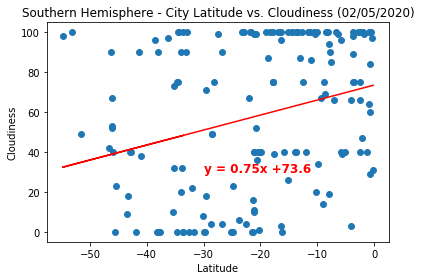

In [22]:
# Regrssion line calculation 
slope, intercept, r_value, p_value, std_err = linregress(southern_h_df['Lat'],southern_h_df['Cloudiness'])
# linear regression line
x = southern_h_df['Lat']
y_pred = intercept + slope * x
regression_text = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
# Print coefficient of determination (r_squared)
print("The r-squared is: {}".format(r_value**2))
# Scatter plot linear regression line
southern_h_df.plot.scatter(x = 'Lat', y = 'Cloudiness', s = 35)
plt.plot(x,y_pred, color="red")
plt.text(-30, 30, regression_text, color = 'red', fontsize = 12, fontweight = 'bold')

plt.title('Southern Hemisphere - City Latitude vs. Cloudiness (' + curdate.strftime("%m/%d/%Y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.tight_layout()
filename = 'Southern_Hemisphere/South_Fig3.png'
# Save 
plt.savefig(output_path + filename)
# Show
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.026035965475217943


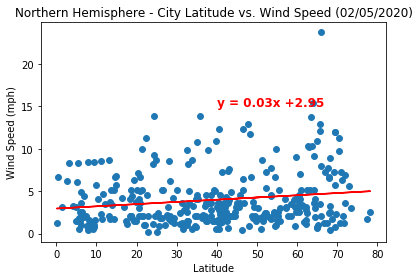

In [23]:
# Regrssion line calculation 
slope, intercept, r_value, p_value, std_err = linregress(northern_h_df['Lat'],northern_h_df['Wind Speed'])
# linear regression line
x = northern_h_df['Lat']
y_pred = intercept + slope * x
regression_text = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
# Print coefficient of determination (r_squared)
print("The r-squared is: {}".format(r_value**2))
# Scatter plot linear regression line
northern_h_df.plot.scatter(x = 'Lat', y = 'Wind Speed', s = 35)
plt.plot(x,y_pred, color="red")
plt.text(40, 15, regression_text, color = 'red', fontsize = 12, fontweight = 'bold')

plt.title('Northern Hemisphere - City Latitude vs. Wind Speed (' + curdate.strftime("%m/%d/%Y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
filename = 'Northern_Hemisphere/North_Fig4.png'
# Save 
plt.savefig(output_path + filename)
# Show
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.14188274656527636


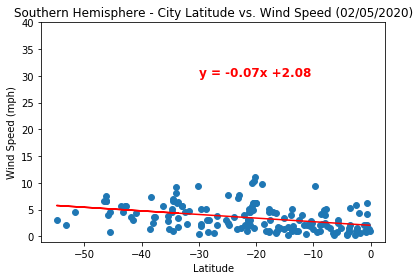

In [25]:
# Regrssion line calculation 
slope, intercept, r_value, p_value, std_err = linregress(southern_h_df['Lat'],southern_h_df['Wind Speed'])
# linear regression line
x = southern_h_df['Lat']
y_pred = intercept + slope * x
regression_text = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
# Print coefficient of determination (r_squared)
print("The r-squared is: {}".format(r_value**2))
# Scatter plot linear regression line
southern_h_df.plot.scatter(x = 'Lat', y = 'Wind Speed', s = 35)
plt.plot(x,y_pred, color="red")
plt.text(-30, 30, regression_text, color = 'red', fontsize = 12, fontweight = 'bold')

plt.title('Southern Hemisphere - City Latitude vs. Wind Speed (' + curdate.strftime("%m/%d/%Y") + ')')
plt.ylim(-1, 40)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
filename = 'Southern_Hemisphere/South_Fig4.png'
# Save 
plt.savefig(output_path + filename)
# Show
plt.show()